In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 500)

In [8]:
file_path = '../input/'

In [9]:
import os
os.listdir(file_path)

['Data_Dictionary.xlsx',
 'new_merchant_transactions.csv',
 'test.csv',
 '~$Data_Dictionary.xlsx',
 'merchants.csv',
 'historical_transactions.csv',
 'train.csv',
 'sample_submission.csv']

# train dataset

In [10]:
train_pd = pd.read_csv(os.path.join(file_path, 'train.csv'))

In [16]:
train_pd.head(4)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495


In [12]:
train_pd.count()

first_active_month    201917
card_id               201917
feature_1             201917
feature_2             201917
feature_3             201917
target                201917
dtype: int64

In [15]:
train_pd.isnull().any()

first_active_month    False
card_id               False
feature_1             False
feature_2             False
feature_3             False
target                False
dtype: bool

## card_id多少个

In [22]:
len(train_pd['card_id'].unique())  ## 每个id是唯一的，通过用户的特征来预测忠诚度

201917

## feature类型

In [23]:
len(train_pd['feature_1'].unique())

5

In [24]:
print(train_pd['feature_1'].unique())

[5 4 2 1 3]


In [25]:
def count_frequence(train_col):
    d = dict()
    for line in train_col:
        if line in d:
            d[line] += 1
        else:
            d[line] = 1
    return d

In [29]:
cf_1 = count_frequence(train_pd['feature_1'])
print(cf_1)

{5: 40625, 4: 19885, 2: 55797, 1: 12037, 3: 73573}


In [31]:
x = sorted(cf_1.keys())
y = [cf_1[x[i]] for i in range(len(x))]

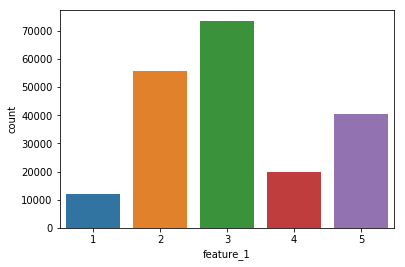

In [37]:
fig = sns.barplot(x=x, y=y)
plt.xlabel('feature_1')
plt.ylabel('count')
plt.show(fig)

In [42]:
def show_count_frequence(train, col):
    cf = count_frequence(train[col])
    x = sorted(cf.keys())
    y = [cf[x[i]] for i in range(len(x))]
    fig = sns.barplot(x, y)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show(fig)

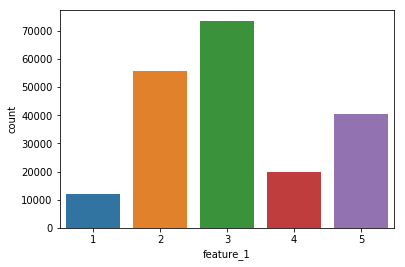

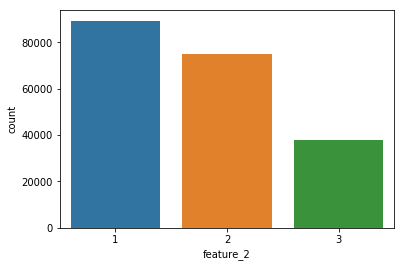

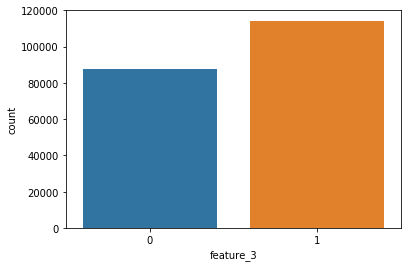

In [43]:
for i in range(1, 4, 1):
    col = "feature_{}".format(i)
    show_count_frequence(train_pd, col)

## target

In [47]:
max(train_pd['target']), min(train_pd['target'])

(17.9650684, -33.21928095)